# Machine Learning Pipeline - Data Analysis

Neste notebook, faremos a análise de dados da base de dados de gastos dos deputados disponível em: https://brasil.io/dataset/gastos-deputados/cota_parlamentar/

=======================================================================================================

## Prevendo o gasto parlamentar

O objetivo do projeto é criar e fazer o deploy de um modelo de Machine Learning que irá prever o gasto de um determinado parlamentar baseado em diferentes variáveis que descrevem os aspectos dos deputados.

### Porque isso é importante?

Prever o gasto parlamentar é útil para identificar e prever gastos ou determinar se os gastos de um determinado parlamentar estão fora do padrão, sugerindo possíveis irregularidades.

### Qual o objetivo do Modelo de Machine Learning?

Buscamos minimizar a diferença entre o gasto real e o gasto estimado por nosso modelo. Nós iremos avaliar a parformance do modelo usando:

1. erro quadrático médio (MSE)
2. raiz do erro quadrátivo médio (RMSE)
3. r-quadrado ($r^2$).

### Como eu baixo o Dataset?

* Visite o site [brasil.io](https://brasil.io/dataset/gastos-deputados/cota_parlamentar/ "Gastos dos deputados - Datasets - Brasil.IO")
* Desça até o meio da página e clique no botão "BAIXAR DADOS COMPLETOS EM CSV para iniciar o download do dataset.
* Extraia o arquivo chamado "cota-parlamentar.csv" e salve-o no diretório com os notebooks.

## Data Analysis

Seguindo adiante, vamos carregar nosso dataset:

In [33]:
# para manipular os datasets
import pandas as pd
import numpy as np

# para plotar gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# para mostrar todas as colunas do dataframe no notebook
pd.pandas.set_option('display.max_columns', None)

In [34]:
# carrega o dataset
data = pd.read_csv('cota-parlamentar.csv')

# linhas e colunas dos dados
print(data.shape)

# visualiza o dataset
data.head()

(3855649, 29)


,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,1672803,2,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,27691290000113,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,1677757,1,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,5265605000128,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,1673164,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN
3,56,2020-02-18 00:00:00,7018634,NaN,4,NaN,2442,2019,2020,0,1678458,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN,186.0,0.0,186.0,NaN
4,56,2020-02-11 00:00:00,7011106,NaN,4,NaN,2442,2019,2020,0,1674574,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,22836210000157,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN,740.0,0.0,740.0,NaN


O dataset contém 3.855.649 linhas e 29 colunas.
28 são variáveis preditivas e 1 é a variável alvo: vlrliquido

### O que iremos analisar

**Nós iremos analisar o seguinte:**

1. A variável alvo
2. Os tipos de variáveis (numéricas e categóricas)
3. Dados faltantes
4. Variáveis Numéricas
6. Variáveis Categóricas

### A Variável Alvo

Vamos começar analisando a distribuição alvo.

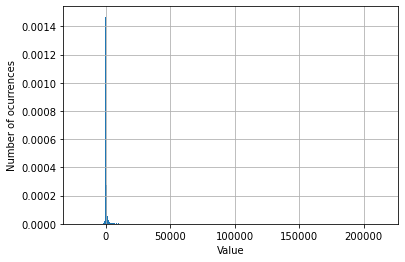

In [35]:
# histograma para avaliar a distribuição dos valores alvo

data['vlrliquido'].hist(bins=497, density=True)
plt.ylabel('Number of ocurrences')
plt.xlabel('Value')
plt.show()

Pode-se observar que o atributo é contínuo, e a distribuição está desviada em direção do lado direito.

### Tipos de variáveis

A seguir, vamos identificar as variáveis categóricas e numéricas

In [36]:
# Vamos identificar as variáveis categóricas
# capturaremos aquelas do tipo *objeto*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# número de variáveis categóricas
len(cat_vars)

10

Este dataset possui 10 variáveis categóricas, ou seja, variáveis que possuem um número fixo de valores possíveis.

In [37]:
# classificar todas as variáveis como categóricas
data[cat_vars] = data[cat_vars].astype('O')

In [38]:
# agora vamos identificar as variáveis numéricas

num_vars = [
    var for var in data.columns if var not in cat_vars and var != 'vlrliquido'
]

# número de variáveis numéricas
len(num_vars)

18

Este dataset possui 18 variáveis numéricas.

### Dados faltantes

Vamos seguir adiante e descobrir quais variáveis do dataset contém valores faltantes.

In [39]:
# cria uma lista de variáveis que contém valores faltantes
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determina a porcentagem de valores faltantes (expresso em decimais)
# e mostra o resultado ordenado por % de dados faltantes

data[vars_with_na].isnull().mean().sort_values(ascending=False)

vlrrestituicao               0.999702
txtdescricaoespecificacao    0.796485
txtpassageiro                0.742780
txttrecho                    0.739585
numressarcimento             0.550323
datemissao                   0.049420
idecadastro                  0.001428
sguf                         0.001428
nucarteiraparlamentar        0.001426
vlrdocumento                 0.000004
txtfornecedor                0.000002
txtnumero                    0.000002
dtype: float64

Nosso dataset contém poucas variáveis com uma grande proporção de valores faltantes (5 variáveis no topo). E algumas outras variáveis com uma pequena porcentagem de observações ausentes.

Isso significa que para treinar um modelo de machine learning com esse dataset, nós precisaremos imputar os dados faltantes nestas variáveis.

Nós também podemos visualizar a porcentagem de valores faltantes nas variáveis conforme abaixo:

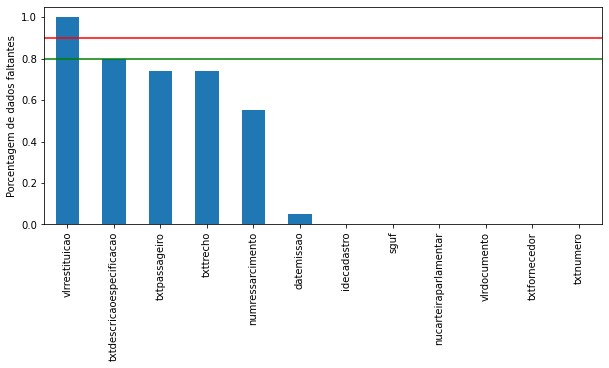

In [40]:
# plotar

data[vars_with_na].isnull().mean().sort_values(
    ascending=False).plot.bar(figsize=(10, 4))
plt.ylabel('Porcentagem de dados faltantes')
plt.axhline(y=0.90, color='r', linestyle='-')
plt.axhline(y=0.80, color='g', linestyle='-')

plt.show()

In [41]:
# agora nós podemos determinar quais variáveis, daquelas com dados faltantes,
# são numéricas e quais são categóricas

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Número de variáveis categóricas com dados faltantes: ', len(cat_na))
print('Número de variáveis numéricas com dados faltantes: ', len(num_na))

Número de variáveis categóricas com dados faltantes:  7
Número de variáveis numéricas com dados faltantes:  5


In [42]:
num_na

['idecadastro',
 'nucarteiraparlamentar',
 'numressarcimento',
 'vlrdocumento',
 'vlrrestituicao']

Acima, podemos ver quais variáveis numéricas possuem dados faltantes.

In [43]:
cat_na

['datemissao',
 'sguf',
 'txtdescricaoespecificacao',
 'txtfornecedor',
 'txtnumero',
 'txtpassageiro',
 'txttrecho']

E acima, podemos ver quais variáveis categóricas possuem dados faltantes.

#### Relacionamento entre os dados faltantes e o valor líquido

Vamos avaliar o valor líquido naquelas observações onde a informação está faltando. Nós iremos fazer isso para cada variável que mostra dados ausentes.

In [44]:
def analyse_na_value(df, var):

    # faz uma cópia do dataframe, de modo a não sobrescrever os dados originais
    # ver o link para mais detalhes sobre pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # vamos fazer uma variável ínterim que indica 1 se a
    # observação é ausente ou 0 se há observação
    df[var] = np.where(df[var].isnull(), 1, 0)

    # Vamos comparar o valor médio do valor líquido nas observações onde os dados estão faltando
    # vs as observações onde os dados estão disponíveis

    # determina o valor líquido médio nos grupos 1 e 0,
    # e o desvio padrão do valor líquido,
    # e nós capturamos o resultado em um dataset temporário
    tmp = df.groupby(var)['vlrliquido'].agg(['mean', 'std'])

    # plota em um gráfico de barras
    tmp.plot(kind="barh", y="mean", legend=False,
             xerr="std", title="Valor líquido", color='green')

    plt.show()

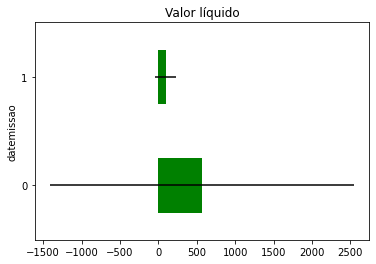

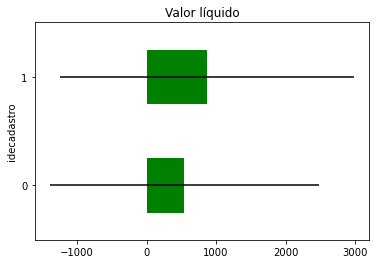

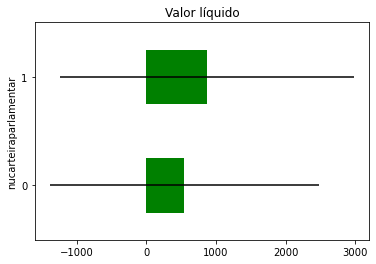

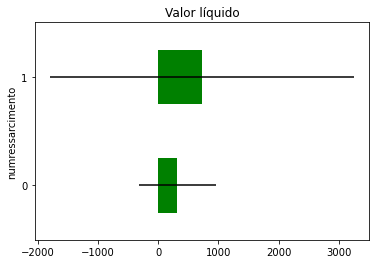

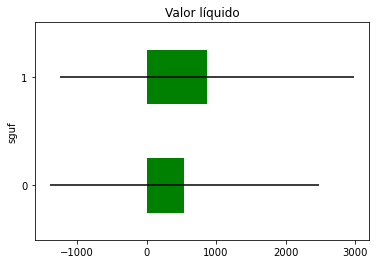

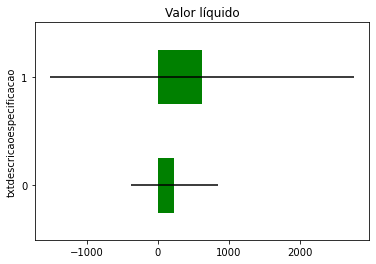

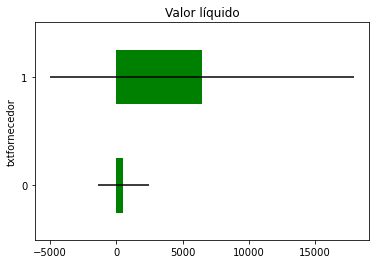

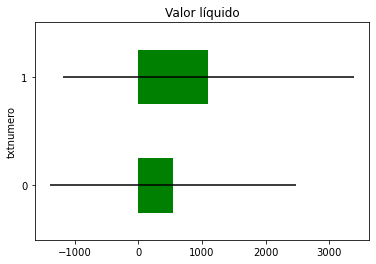

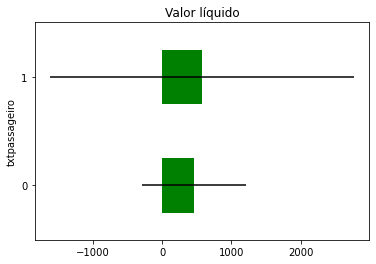

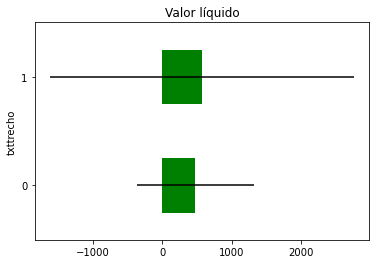

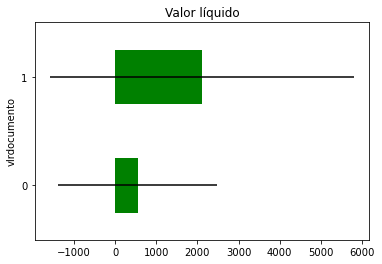

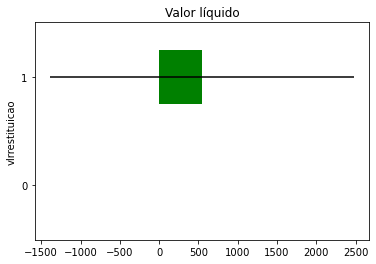

In [45]:
# vamos rodar a função em cada variável com dados ausentes

for var in vars_with_na:
    analyse_na_value(data, var)

### Variáveis Numéricas

Vamos seguir adiante e descobrir quais variáveis numéricas nós temos no dataset.

In [46]:
print('Número de variáveis numéricas: ', len(num_vars))

# visualiza as variáveis numéricas
data[num_vars].head()

Número de variáveis numéricas:  18


,codlegislatura,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,txtcnpjcpf,vlrdocumento,vlrglosa,vlrrestituicao
0,56,7007086,NaN,0,NaN,2442,2019,2020,0,1672803,2,0,NaN,5,27691290000113,998.0,0.0,NaN
1,56,7017162,NaN,4,NaN,2442,2019,2020,0,1677757,1,0,NaN,5,5265605000128,4920.0,0.0,NaN
2,56,7007754,NaN,4,NaN,2442,2019,2020,0,1673164,2,0,NaN,13,4538454000171,511.0,0.0,NaN
3,56,7018634,NaN,4,NaN,2442,2019,2020,0,1678458,2,0,NaN,13,4538454000171,186.0,0.0,NaN
4,56,7011106,NaN,4,NaN,2442,2019,2020,0,1674574,2,0,NaN,13,22836210000157,740.0,0.0,NaN


#### Variáveis temporais

Nós temos 3 variáveis temporais no dataset:

* numlegislatura: Legislatura vigente durante o registro
* numano: Ano do registro
* nummes: Mês do registro

Geralmente, não se usa variáveis de data no seu formato normal. Ao invés disso, nós extraimos informações deles. Por exemplo, nós podemos capturar a diferença em anos entre o ano atual e o ano que o gasto foi feito.

In [47]:
# Lista de variáveis que contém informação de ano

year_vars = [var for var in num_vars if 'ano' in var or 'nuleg' in var]

year_vars

['nulegislatura', 'numano']

In [48]:
# Lista de variáveis que contém informação de mês

month_vars = [var for var in num_vars if 'nummes' in var]

month_vars

['nummes']

In [49]:
# vamos explorar os valores destas variáveis temporais

for var in year_vars:
    print(var, data[var].unique())
    print()

nulegislatura [2019 2015 2011 2007]

numano [2020 2016 2019 2012 2017 2013 2009 2018 2011 2014 2010 2015]



In [50]:
# vamos explorar os valores destas variáveis temporais

for var in month_vars:
    print(var, data[var].unique())
    print()

nummes [ 2  1  3  6  8 10 11  4 12  9  5  7]



Conforme esperado, os valores são anos e meses.

Nós podemos explorar a evolução dos gastos parlamentares por ano:

Text(0, 0.5, 'Gasto parlamentar mediano por ano')

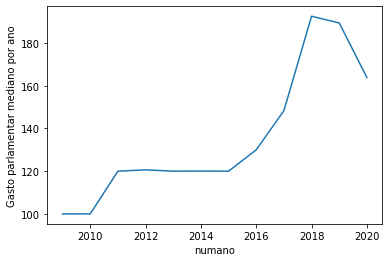

In [51]:
# plota a mediana do gasto anual vs o ano em que o gasto foi feito

data.groupby('numano')['vlrliquido'].median().plot()
plt.ylabel('Gasto parlamentar mediano por ano')

Text(0, 0.5, 'Gasto parlamentar mediano por legislatura')

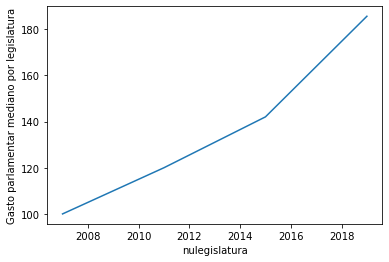

In [52]:
# plota a mediana do gasto anual vs a legislatura em que o gasto foi feito

data.groupby('nulegislatura')['vlrliquido'].median().plot()
plt.ylabel('Gasto parlamentar mediano por legislatura')

Text(0, 0.5, 'Gasto parlamentar mediano por mês')

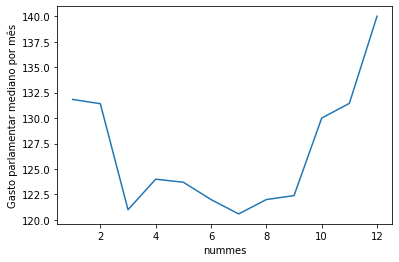

In [53]:
# plota a mediana do gasto anual vs o mês em que o gasto foi feito

data.groupby('nummes')['vlrliquido'].median().plot()
plt.ylabel('Gasto parlamentar mediano por mês')

#### Variáveis discretas

In [65]:
# Vamos fazer uma lista de variáveis discretas
discrete_vars = [var for var in num_vars if len(
    data[var].unique()) < 20 and var not in year_vars+month_vars]


print('Número de variáveis discretas: ', len(discrete_vars))

Número de variáveis discretas:  5


In [66]:
# Vamos visualizar as variáveis discretas

data[discrete_vars].head()

,codlegislatura,indtipodocumento,numespecificacaosubcota,numparcela,numressarcimento
0,56,0,0,0,NaN
1,56,4,0,0,NaN
2,56,4,0,0,NaN
3,56,4,0,0,NaN
4,56,4,0,0,NaN


Vamos analisar abaixo a contribuição dessas variáveis para o gasto realizado.

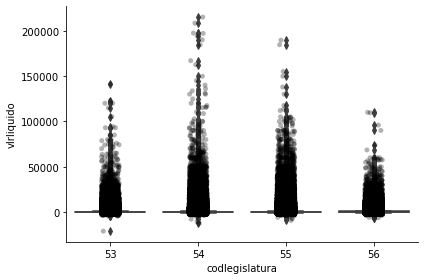

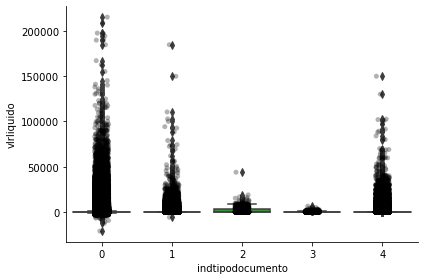

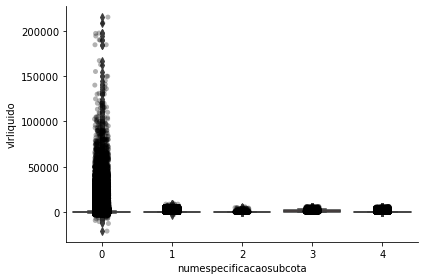

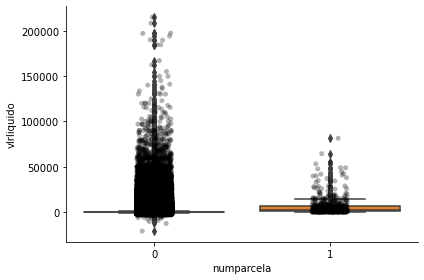

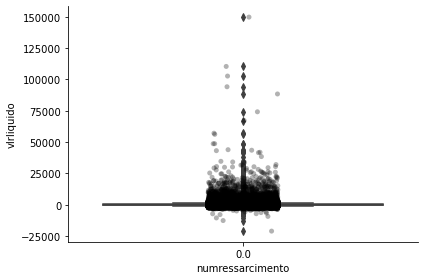

In [67]:
for var in discrete_vars:
    # cria um boxplot com Catplot
    sns.catplot(x=var, y='vlrliquido', data=data, kind="box", height=4, aspect=1.5)
    # adiciona data points ao boxplot com stripplot
    sns.stripplot(x=var, y='vlrliquido', data=data, jitter=0.1, alpha=0.3, color='k')
    plt.show()

Para o mês, podemos observar um aumento no valor líquido dos gastos conforme o fim do ano se aproxima e as legislaturas apresentam uma tendência de queda.

Para algumas variáveis, não é possível observar tendências. É provável que algumas não sejam bons preditores para o Valor Líquido do gasto.

#### Variáveis contínuas

In [70]:
# Faz uma lista de variáveis contínuas
cont_vars = [
    var for var in num_vars if var not in discrete_vars+year_vars+month_vars]

print('Número de variáveis contínuas: ', len(cont_vars))

Número de variáveis contínuas:  10


In [71]:
# vamos visualizar as variáveis contínuas

data[cont_vars].head()

,idedocumento,idecadastro,nucarteiraparlamentar,nudeputadoid,numlote,numsubcota,txtcnpjcpf,vlrdocumento,vlrglosa,vlrrestituicao
0,7007086,NaN,NaN,2442,1672803,5,27691290000113,998.0,0.0,NaN
1,7017162,NaN,NaN,2442,1677757,5,5265605000128,4920.0,0.0,NaN
2,7007754,NaN,NaN,2442,1673164,13,4538454000171,511.0,0.0,NaN
3,7018634,NaN,NaN,2442,1678458,13,4538454000171,186.0,0.0,NaN
4,7011106,NaN,NaN,2442,1674574,13,22836210000157,740.0,0.0,NaN


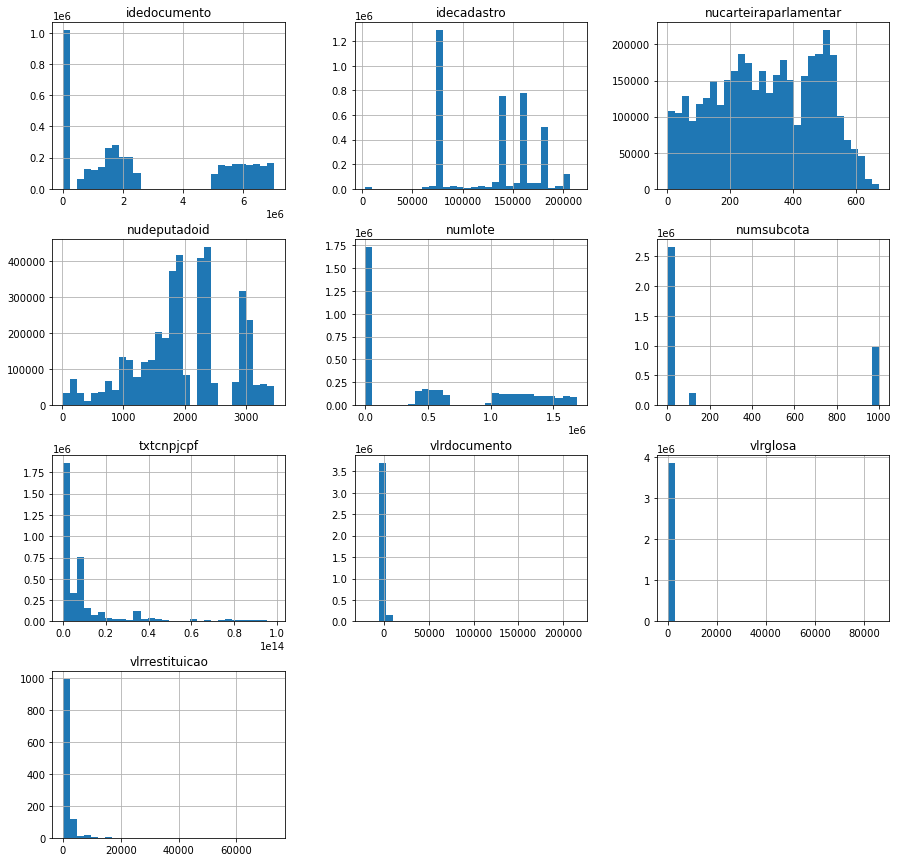

In [72]:
# Vamos plotar histogramas para todas as variáveis contínuas
data[cont_vars].hist(bins=30, figsize=(15,15))
plt.show()

### Variáveis Categóricas

Vamos seguir adiante e analisar as variáveis categóricas presentes no dataset.

In [61]:
print('Número de variáveis categóricas: ', len(cat_vars))

Número de variáveis categóricas:  10


In [62]:
# Vamos visualizar os valores das variáveis categóricas
data[cat_vars].head()

,datemissao,sgpartido,sguf,txnomeparlamentar,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho
0,2020-02-01 00:00:00,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN
1,2020-02-13 00:00:00,PSDB,NaN,LIDERANÇA DO PSDB,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN
2,2020-02-04 00:00:00,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN
3,2020-02-18 00:00:00,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,311,NaN,NaN
4,2020-02-11 00:00:00,PSDB,NaN,LIDERANÇA DO PSDB,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,ARTESANAL SERVICOS DE ALIMENTACAO E BUFFET EIRELI,23,NaN,NaN


#### Número de categorias: cardinalidade

Vamos avaliar quantas categorias estão presentes em cada uma das variáveis.

<AxesSubplot:>

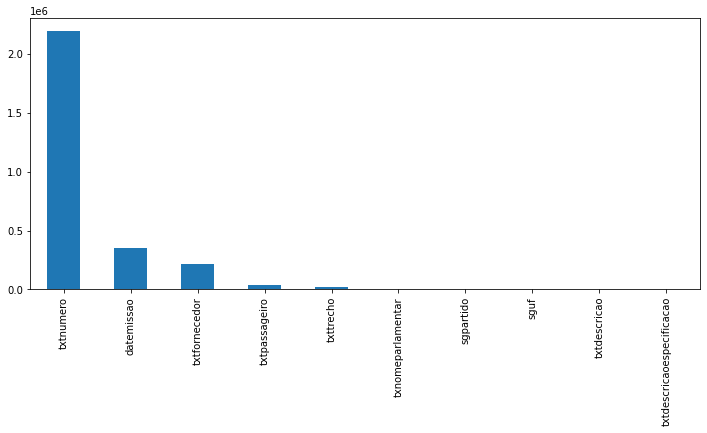

In [63]:
# Nós contamos as categorias únicas com pandas unique() 
# e as plotamos em ordem descendente

data[cat_vars].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

#### Rótulos raros

Vamos seguir adiante a investigar se existem rótulos que estão presentes apenas em um pequeno número de registros.

In [75]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determina a porcentagem de observações por categoria
    tmp = df.groupby(var)['vlrliquido'].count() / len(df)

    # retorna as categorias que são raras
    return tmp[tmp < rare_perc]

# imprime as categorias que estão presentes em menos de
# 1 % das observações

for var in cat_vars:
    print(analyse_rare_labels(data, var, 0.01))
    print()

datemissao
1959-11-03 00:00:00    2.593597e-07
2000-04-27 00:00:00    2.593597e-07
2000-09-29 00:00:00    5.187194e-07
2000-10-20 00:00:00    2.593597e-07
2000-10-22 00:00:00    2.593597e-07
                           ...     
5012-06-28 00:00:00    2.593597e-07
5020-10-23 00:00:00    2.593597e-07
5201-05-03 00:00:00    2.593597e-07
8201-08-27 00:00:00    2.593597e-07
9009-11-03 00:00:00    2.593597e-07
Name: vlrliquido, Length: 348119, dtype: float64

sgpartido
ATHOS AVELINO         2.593597e-07
AVANTE                4.632683e-03
CIDADANIA             1.417141e-03
FERNANDO ESTIMA       2.593597e-07
JOÃO FONTES           2.593597e-07
LID.GOV-CD            3.008573e-05
LID.GOV-CN            1.089311e-05
LIDMIN                7.262072e-06
LUIZ MOREIRA          5.187194e-07
NOVO                  8.470688e-04
PATRI                 3.843452e-03
PATRIOTA              6.655170e-04
PEN                   1.890732e-04
PHS                   3.153036e-03
PL                    5.071779e-03
PMN     

Algumas variáveis categóricas mostram múltiplos rótulos que representam menos de 1% das observações.

Rótulos que estão sub-representados no dataset tendem a causar over-fitting em modelos de machine learning.

É por isso que queremos removê-los.

Finalmente, nós queremos explorar a relação entre as categorias de diferents variáveis e o valor líquido do gasto:

**Aviso:**

Certamente há bem mais a ser feito para entender a natureza desses dados e o relacionamento entre as variáveis com a variável alvo, vlrliquido. E também sobre a distribuição das variáveis em si.

Este notebook faz parte de um estudo que está em constante desenvolvimento.